# Investigate Regression Output
After running EBUS-Extraction to pull out the given upwelling system, I ran the climate-correlation.py script to correlate a near-offshore region of the EBUS with specific climate indices. This saves some CSV files with regression results that will now be interpreted here.

In [57]:
# Numerics
import numpy as np
import pandas as pd
import xarray as xr

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
ens = ['001', '002', '009', '010', '011',
       '012', '013', '014', '015', '016',
       '017', '018', '019', '020', '021',
       '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031',
       '032', '033', '034', '035', '101',
       '102', '103', '104', '105']

In [66]:
fileDir = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/processed/calcs/'
df_enso = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_enso_calcs')
df_pdo = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_pdo_calcs')
df_npo = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_npo_calcs')
#df_sam = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_sam_humcs')

In [69]:
# Drop a NaN row from a mistake in the code.
df_enso = df_enso.drop(df_enso.index[34])
df_pdo = df_pdo.drop(df_pdo.index[34])
df_npo = df_npo.drop(df_npo.index[34])

# Change out the indices to ensemble numbers
df_enso.index = ens
df_pdo.index = ens
df_npo.index = ens
#df_sam.index = ens

In [70]:
pdo = np.asarray(df_pdo['R Value'])
enso = np.asarray(df_enso['R Value'])
npo = np.asarray(df_npo['R Value'])
#sam = np.asarray(df_sam['R Value'])

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(ipo, sam, color='k', s=49)
plt.xlabel('IPO Correlation', fontsize='x-large')
plt.ylabel('SAM Correlation', fontsize='x-large')
plt.title('HumCS Sea-Air CO2 Flux Correlations \n (Annual Filter; 1920-2015)', fontsize='x-large')
#plt.yticks(np.arange(0.10, 0.5, 0.05))
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.savefig('HumCS-IPO-SAM-Correlation-Scatter.png', pad_inches=0.1)

In [72]:
def hist_plot(ax, data, climate_index):
    sns.distplot(data, kde=False, color='b', norm_hist=False, bins=7)
    ax.set_title(climate_index + ' Correlation Distribution (N=34)', size='x-large')
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel('R Value', size=15)
    plt.ylim([0, 14])
    plt.xlim([-1, 1])
    plt.plot([0, 0], [0, 14], linewidth=1, color='k')

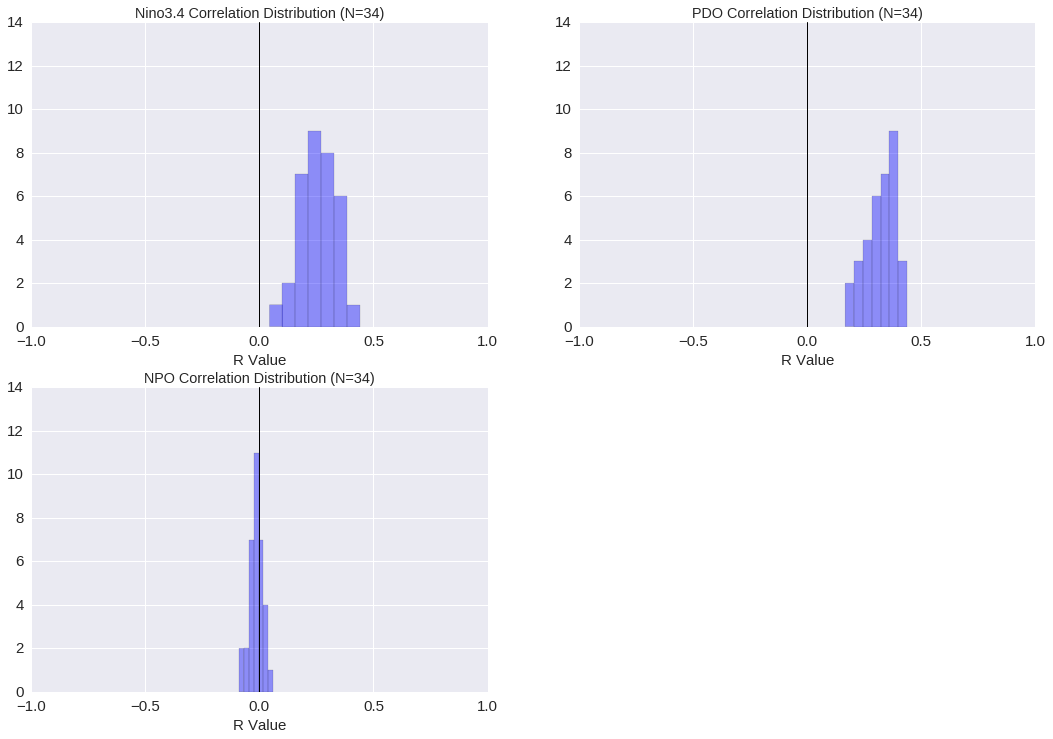

In [75]:
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
hist_plot(ax1, df_enso['R Value'], 'Nino3.4')
ax2 = fig.add_subplot(222)
hist_plot(ax2, df_pdo['R Value'], 'PDO')
ax3 = fig.add_subplot(223)
hist_plot(ax3, df_npo['R Value'], 'NPO')
#ax4 = fig.add_subplot(224)
#hist_plot(ax4, df_sam['R Value'], 'SAM')
plt.savefig("calcs-correlation-histograms.png")

# Outputting to LaTeX

In [65]:
df_pdo

,Slope,R Value,R Squared
001,-0.227228,-0.275558,0.075932
002,-0.198213,-0.238082,0.056683
009,-0.173210,-0.218904,0.047919
010,-0.271785,-0.360475,0.129942
011,-0.293936,-0.378696,0.143411
012,-0.195640,-0.248388,0.061697
013,-0.218135,-0.301554,0.090935
014,-0.252009,-0.302917,0.091759
015,-0.171827,-0.226605,0.051350
016,-0.177365,-0.215112,0.046273


In [64]:
df_pdo = df_pdo.drop('P-Value', 1)
print df_pdo.round(2).to_latex()
#np.std(df_pdo['R Squared'].values).round(2)

\begin{tabular}{lrrr}
\toprule
{} &  Slope &  R Value &  R Squared \\
\midrule
001 &  -0.23 &    -0.28 &       0.08 \\
002 &  -0.20 &    -0.24 &       0.06 \\
009 &  -0.17 &    -0.22 &       0.05 \\
010 &  -0.27 &    -0.36 &       0.13 \\
011 &  -0.29 &    -0.38 &       0.14 \\
012 &  -0.20 &    -0.25 &       0.06 \\
013 &  -0.22 &    -0.30 &       0.09 \\
014 &  -0.25 &    -0.30 &       0.09 \\
015 &  -0.17 &    -0.23 &       0.05 \\
016 &  -0.18 &    -0.22 &       0.05 \\
017 &  -0.23 &    -0.34 &       0.11 \\
018 &  -0.14 &    -0.17 &       0.03 \\
019 &  -0.26 &    -0.32 &       0.10 \\
020 &  -0.26 &    -0.38 &       0.15 \\
021 &  -0.27 &    -0.35 &       0.12 \\
022 &  -0.29 &    -0.35 &       0.12 \\
023 &  -0.16 &    -0.19 &       0.04 \\
024 &  -0.26 &    -0.34 &       0.12 \\
025 &  -0.25 &    -0.30 &       0.09 \\
026 &  -0.17 &    -0.21 &       0.04 \\
027 &  -0.24 &    -0.29 &       0.08 \\
028 &  -0.20 &    -0.31 &       0.09 \\
029 &  -0.26 &    -0.27 &       0.07 \\
0